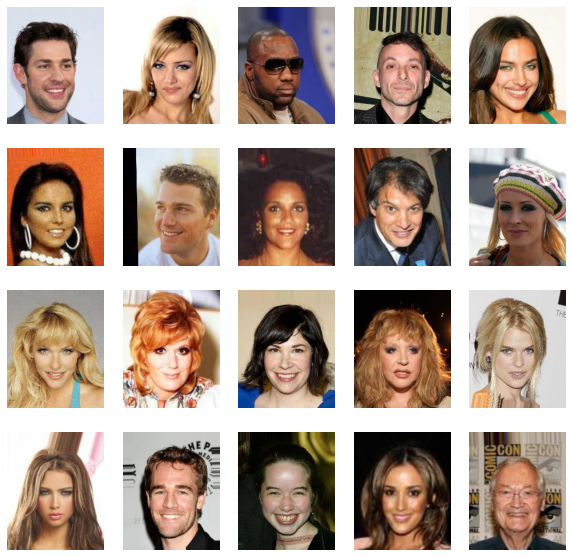

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import matplotlib.image as mpimg

images=[]
img_path="../input/celeba-dataset/img_align_celeba/img_align_celeba"
for files in os.listdir(os.path.join(img_path)):
    images.append(files)
plt.figure(figsize=(10,10))
img_per_col=5
for i in range(20):
    plt.subplot(20//img_per_col,img_per_col,i+1)
    plt.axis('off')
    img=mpimg.imread(os.path.join(img_path,images[i]))
    plt.imshow(img)


In [8]:
# attribute_df=pd.read_csv("../input/celeba-dataset/list_attr_celeba.csv") # organs attri
# attribute_df=pd.read_csv("../input/celeba-dataset/list_bbox_celeba.csv") # height width
attribute_df=pd.read_csv("../input/celeba-dataset/list_landmarks_align_celeba.csv")
attribute_df.head()

,image_id,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
0,000001.jpg,69,109,106,113,77,142,73,152,108,154
1,000002.jpg,69,110,107,112,81,135,70,151,108,153
2,000003.jpg,76,112,104,106,108,128,74,156,98,158
3,000004.jpg,72,113,108,108,101,138,71,155,101,151
4,000005.jpg,66,114,112,112,86,119,71,147,104,150


In [9]:
# code for generator 

import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import LeakyReLU,Conv2DTranspose,Dense,Reshape,BatchNormalization,Conv2D,Dropout,Flatten

input_dim=100

generator=Sequential([
    keras.Input(shape=(100,)),
    Dense((1024*4*4)),
    BatchNormalization(),
    LeakyReLU(alpha=0.2),

    Reshape((4,4,1024)),
    Conv2D(1024,kernel_size=(5,5),strides=(1,1),padding='same',use_bias=False),
    BatchNormalization(),
    LeakyReLU(alpha=0.2),

    Conv2DTranspose(512,kernel_size=(5,5),strides=(2,2),padding='same',use_bias=False),
    BatchNormalization(),
    LeakyReLU(alpha=0.2),    

    
    Conv2DTranspose(256,kernel_size=(5,5),strides=(2,2),padding='same',use_bias=False),
    BatchNormalization(),
    LeakyReLU(alpha=0.2),

    
    Conv2DTranspose(128,kernel_size=(5,5),strides=(2,2),padding='same',use_bias=False),
    BatchNormalization(),
    LeakyReLU(alpha=0.2),

    Conv2DTranspose(3,kernel_size=(5,5),strides=(2,2),padding='same',use_bias=False,activation='tanh'), 
    ],
    name='generator'
)
generator.summary()

Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16384)             1654784   
_________________________________________________________________
batch_normalization (BatchNo (None, 16384)             65536     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 16384)             0         
_________________________________________________________________
reshape (Reshape)            (None, 4, 4, 1024)        0         
_________________________________________________________________
conv2d (Conv2D)              (None, 4, 4, 1024)        26214400  
_________________________________________________________________
batch_normalization_1 (Batch (None, 4, 4, 1024)        4096      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 4, 4, 1024)        0 

2021-12-28 17:21:06.087468: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-28 17:21:06.182037: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-28 17:21:06.182719: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-28 17:21:06.183819: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [10]:
discriminator=Sequential([
    Conv2D(64,kernel_size=(5,5),strides=(2,2),padding='same',input_shape=[64,64,3]),
    LeakyReLU(),
    Dropout(0.3),

    Conv2D(128,kernel_size=(5,5),strides=(2,2),padding='same'),
    LeakyReLU(),
    Dropout(0.3),

    Conv2D(256,kernel_size=(5,5),strides=(2,2),padding='same'),
    LeakyReLU(),
    Dropout(0.3),

    Flatten(),
    Dense(1,activation='sigmoid')
    ],
    name='discriminator'
)

discriminator.summary(0)

Model: "discriminator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        4864      
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       204928    
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 16, 16, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 256)       

In [11]:
# from keras.preprocessing.image import ImageDataGenerator
# train_dataset_path="../input/celeba-dataset/img_align_celeba"
# batch_size=32 
# train_datagen=ImageDataGenerator( 
#     zoom_range=0.1,
#     rescale=1./255, 
#     horizontal_flip=True,
#     fill_mode='nearest'
# ) 
# train_generator=train_datagen.flow_from_directory(
#     train_dataset_path,
#     target_size=(64, 64),
#     color_mode='rgb', 
#     class_mode='categorical',
#     batch_size=batch_size,
#     shuffle=True,
#     interpolation='nearest'  
# )

In [12]:
# import matplotlib.pyplot as plt
# import tensorflow as tf
# BatchedImage,label=train_generator.next()
# show=10
# # for img,lbl in zip(BatchedImage,label):
# #     plt.imshow(img)
# #     plt.title(img.shape)
# #     plt.axis=False
# #     plt.show()
# #     show+=1
# #     if(show==10):
# #         break
# print(tf.shape(BatchedImage)[0])

In [13]:
from tensorflow import keras
dataset = keras.preprocessing.image_dataset_from_directory(
    "../input/celeba-dataset/img_align_celeba", label_mode=None, image_size=(64, 64), batch_size=32
)
dataset = dataset.map(lambda x: x / 255.0)

Found 202599 files belonging to 1 classes.


In [18]:
import tensorflow as tf
class GAN(keras.Model):
    def __init__(self, discriminator, generator, latent_dim):
        super(GAN, self).__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super(GAN, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn
        self.d_loss_metric = keras.metrics.Mean(name="d_loss")
        self.g_loss_metric = keras.metrics.Mean(name="g_loss")

    @property
    def metrics(self):
        return [self.d_loss_metric, self.g_loss_metric]

    def train_step(self, real_images):
        # Sample random points in the latent space
        batch_size = tf.shape(real_images)[0]
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))

        # Decode them to fake images
        generated_images = self.generator(random_latent_vectors)

        # Combine them with real images
        combined_images = tf.concat([generated_images, real_images], axis=0)

        # Assemble labels discriminating real from fake images
        labels = tf.concat(
            [tf.ones((batch_size, 1)), tf.zeros((batch_size, 1))], axis=0
        )
        # Add random noise to the labels - important trick!
        labels += 0.05 * tf.random.uniform(tf.shape(labels))

        # Train the discriminator
        with tf.GradientTape() as tape:
            predictions = self.discriminator(combined_images)
            d_loss = self.loss_fn(labels, predictions)
        grads = tape.gradient(d_loss, self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(
            zip(grads, self.discriminator.trainable_weights)
        )

        # Sample random points in the latent space
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))

        # Assemble labels that say "all real images"
        misleading_labels = tf.zeros((batch_size, 1))

        # Train the generator (note that we should *not* update the weights
        # of the discriminator)!
        with tf.GradientTape() as tape:
            predictions = self.discriminator(self.generator(random_latent_vectors))
            g_loss = self.loss_fn(misleading_labels, predictions)
        grads = tape.gradient(g_loss, self.generator.trainable_weights)
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))

        # Update metrics
        self.d_loss_metric.update_state(d_loss)
        self.g_loss_metric.update_state(g_loss)
        return {
            "d_loss": self.d_loss_metric.result(),
            "g_loss": self.g_loss_metric.result(),
        }

In [15]:
from tensorflow import keras
class GANMonitor(keras.callbacks.Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.normal(shape=(self.num_img, self.latent_dim))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = keras.preprocessing.image.array_to_img(generated_images[i])
            img.save("./gen_images/generated_img_%03d_%d.png" % (epoch, i))

In [19]:
print(dataset)
epochs = 50  # In practice, use ~100 epochs

gan = GAN(discriminator=discriminator, generator=generator, latent_dim=100)
gan.compile(
    d_optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    g_optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss_fn=keras.losses.BinaryCrossentropy(),
)

gan.fit(
    dataset, epochs=epochs, callbacks=[GANMonitor(num_img=10, latent_dim=100)]
)

<MapDataset shapes: (None, 64, 64, 3), types: tf.float32>
Epoch 1/50


2021-12-28 17:26:55.378680: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


3651/6332 [================>.............] - ETA: 5:39 - d_loss: -342.2391 - g_loss: 134758.0781

KeyboardInterrupt: 

In [ ]:
!cd /kaggle/working/
!mkdir gen_images